# Project 1 - Classification
## CS (STAT) 5525 Due - April 1, 2021
## Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of classification algorithms on several synthetic and real-world data sets. This will be done in the following steps:
- First, you will explore the data sets.
- Next, you will perform a series of experiments on which you will be asked to answer
a series of questions. For these experiments, you will be running a Python Jupyter notebook.
- Third, you will compile your answers in the form of a report.

## Python Jupyter Notebooks
We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:
- Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
- Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handling-issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
- Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/,
https://www.youtube.com/watch?v=3C9E2yPBw7s
1

## Before you Begin
- Visually explore the data sets in the experiments below, and consider the following:
    - Types of attributes 
    - Class distribution
    - Which attributes appear to be good predictors, if any
    - Possible correlation between attributes
    - Any special structure that you might observe - Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow
- Use precision and recall as evaluation metrics to report classification performance.
- Your goal is to learn everything that you can about the dataset. Answer the questions
below as a starting point, but you should dig further. What more can you discover? The goal of this assignment is to give a helping hand for you to discover the most interesting and surprising things.
Report and Submission
- Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
- Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

## 1 Problem 1 [37 points]
The files for this problem are under the Experiment 1 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to use as a starting point: Exploratory data analysis.ipynb. In this experiment, we will do exploratory data analysis to get a better sense of data. The dataset contains record of telecom customer along with the label "churn". Churn = "true" signifies that the customer has left the company and churn = "false" signifies that the customer is still loyal to the company. Answer the following questions

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('Experiment_-_1/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. How many records are there in the dataset?

In [6]:
len(df)

3333

In [7]:
df.shape[0]

3333

2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [8]:
df.shape[1]

21

In [9]:
len(df.columns)

21

In [10]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [17]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


4. What is the average number of customer service calls made by a customer to the company?

In [20]:
df["customer service calls"].mean()

1.5628562856285628

5. What is the distribution of the class variable, "churn"? Calculate the probability of P(churn = True) and P(churn = False).

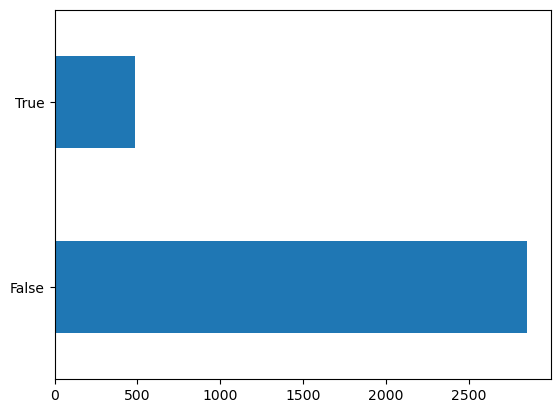

In [14]:
df["churn"].value_counts().plot.barh();

In [18]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

6. What is the distribution of the feature, "international plan"? Calculate the probability of P(international plan = 'yes') and P(international plan = 'no').

7. Assume you have devised a classification model that states that if "international plan" = 'no', then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

8. Calculate the following conditional probabilities:
- P(churn = True | international plan = `yes')
- P(churn = False | international plan = `yes')
- P(churn= True | international plan = `no')
- P(churn = False | international plan = `no')

Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: "Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?"

9. Assume you have devised a classification model which states that if "international plan" = "yes" and the number of calls to the service center is greater than 3, then the customer will churn (i.e., "churn" = True). Report the accuracy of this classification model on the given dataset.

## 2 Problem 2 [23 points]
The files for this problem are under the Experiment 2 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point: Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation. To visualize decision tree we need additional packages to be installed i.e., Graphviz and pydotplus (check the Anaconda.org page for instructions on how to install them using conda). Answer the following questions:
1. Consider training decision trees for the synthetic dataset involving two classes. How does the decision boundary look like when we overfit ( max depth  4 ) and underfit (max depth = 1) the decision tree on the given data? For both cases, paste the decision tree and the decision boundary from Jupyter notebook output.

2. Decision tree classifier sklearn.tree.DecisionT reeClassif ier has parameter "max depth" which defines the maximum depth of the tree. What happens if we don't specify any value for this parameter? Paste the decision tree and the decision boundary you will obtain for this default case from Jupyter notebook output.

3. For Bank Dataset, what are the 5 different age values that the decision tree used to construct the splits of the tree? What is the significance of these 5 values?

4. For the customer churn prediction task, we show that the accuracy of the decision tree is 94% when max depth is set to 5. What happens to accuracy when we leave the value of max depth to its default value? Explain the rise/fall of accuracy.

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler sklearn.preprocessing.StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1, 1]], write down its scaler transformation.

6. How many decision trees do we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation with the above scenario, how many decision trees do we construct in total?

7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario?

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

## 3 Problem 3 [10 points]
The files for this problem are under Experiment 3 folder. Datasets to be used for experimentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or spam. In this experiment we will learn about text features, how to convert them in matrix form, and apply the Naive Bayes algorithm. Answer the following questions: 
1. What is the distribution of the "label" class. Is it skewed? 

2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency? 

3. What is the maximum and minimum length of SMS present in the dataset? 

4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?

5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.